<a href="https://colab.research.google.com/github/dhanush852/intro_to-ml/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('drive/My Drive')

In [ ]:
os.chdir('ml datasets')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ml datasets/D3.csv')
df

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


MODEL FOR EXPLONATORY VARIABLE X1 VS Y

In [ ]:
# Separate features and labels
X = df.values[:, 0]  # get input values from first column -- X is a list here
y = df.values[:, 3]  # get output values from second column -- Y is the list here
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

X =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100


In [ ]:
print('X = ', X[: 96])
print('y = ', y[: 96])


X =  [0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525252 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454546 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.5050505  2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111
 3.15151515 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535
 3.39393939 3.43434343 3.47474748 3.51515151 3.55555556 3.5

In [ ]:
from IPython.display import display
display(df)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


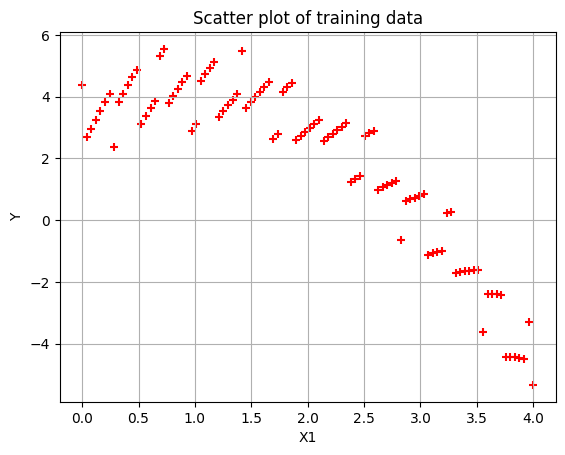

In [ ]:
X = df.values[:, 0]  # get input values from the first column -- X is a list here which is a 1 dimentional array
y = df.values[:, 3]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(X, y, color='red', marker='+')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [ ]:
#We walk through the initial steps of building a linear regression model from scratch using NumPy. Let's break down what you're doing:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
#X_1 = X.reshape(m, 1): You're reshaping features (X) to make it a 2D array suitable for matrix operations.
#X = np.hstack((X_0, X_1)): We're horizontally stacking X_0 and X_1 to create final feature matrix X.

In [ ]:
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
X_1 = X.reshape(m, 1)
X_1[:10]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616],
       [0.2020202 ],
       [0.24242424],
       [0.28282828],
       [0.32323232],
       [0.36363636]])

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [ ]:
theta = np.zeros(2)
theta

array([0., 0.])

In [ ]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [ ]:
theta = [0., 0.]
iterations = 1500
alpha = 0.01

In [ ]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.71850653 -1.9568206 ]
cost_history = [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]


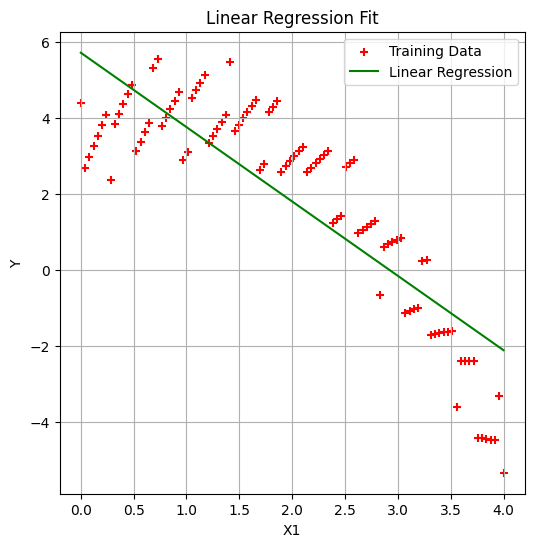

In [ ]:

# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


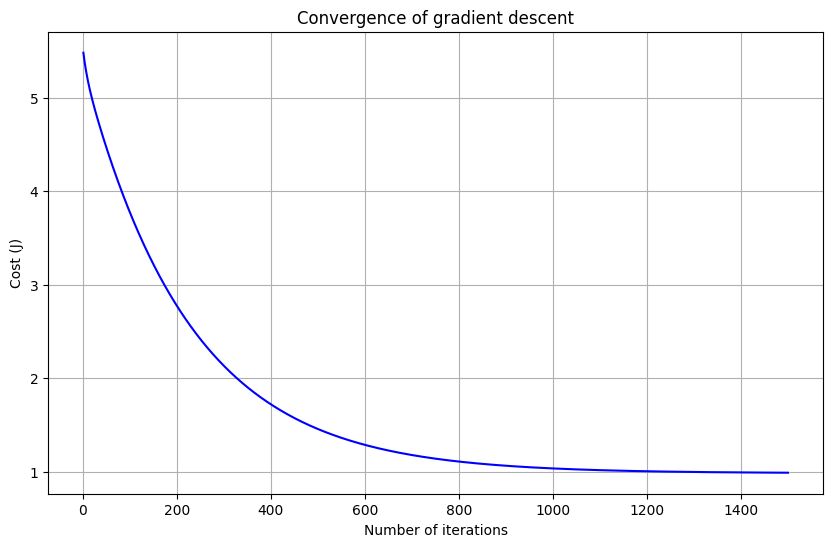

In [ ]:


plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [ ]:
#   second x2

MODEL FOR EXPLONATORY VARIABLE X2 VS Y

X =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100
X =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798 2.91474747
 3.60969697 0.30464646 0.99959596 1.69454546 2.38949495 3.08444444
 3.77939394 0.47434343 1.16929293 1.86424242 2.55919192 3.25414141
 3.94909091 0.6440404  1.3389899  2.03393939 2.72888889 3.42383838
 0.11878788 0.81373737 1.50868687 2.20363636 2.89858586 3.59353535
 0.28848485 0.98343434 1.67838384 2.37333333 3.06828283 3.76323232
 0.45818182 1.15313131 1.84808081 2.5430303  3.2379798  3.93292929
 0.62787879 1.32282828 2.01777778 2.71272727 3.40767677 0.10262626
 0.79757576 1.49252525 2.18747475 2.88242424 3.57737374 0.27232323
 0.96727273 1.66222222 2.35717172 3.05212121 3.74707071 0.4420202
 1.1369697  1.83191919 2.52686869 3.22181818 3.91676768 0.61171717
 1.30666667 2.00161616 2.69656566 3.39151515 0.08646465 0.78141414
 1.47636364 2.17131313 2.86626263 3.56121212 0.256

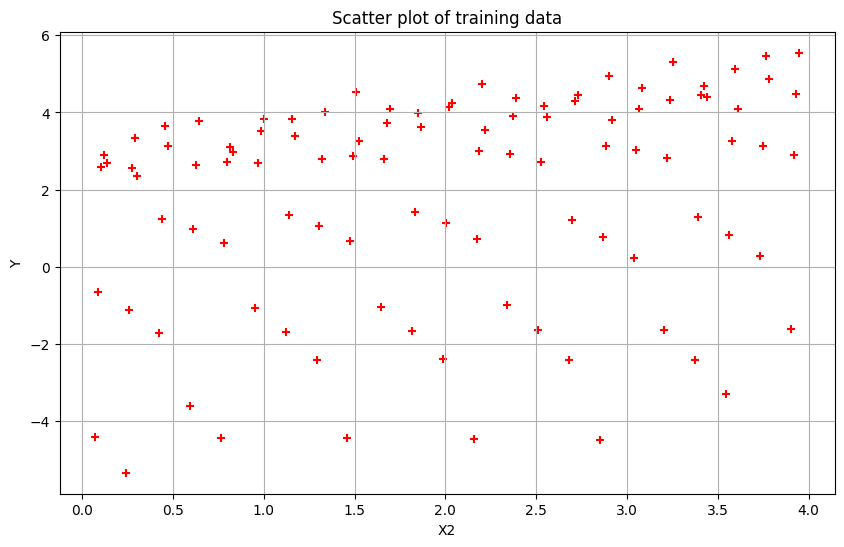

The cost for given values of theta_0 and theta_1 = 5.524438459196242
Final value of theta = [0.71988473 0.56390334]
cost_history = [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]


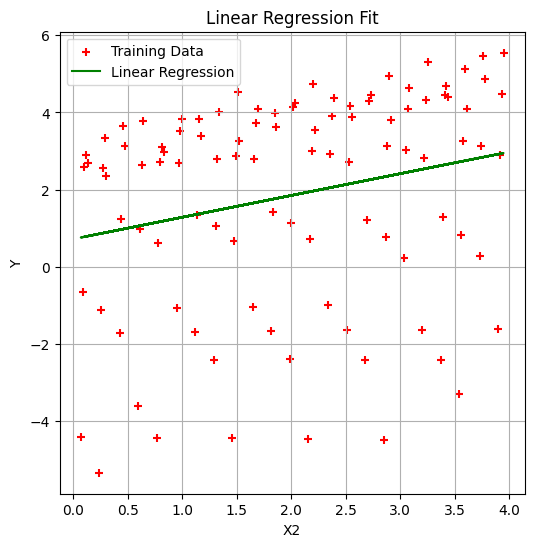

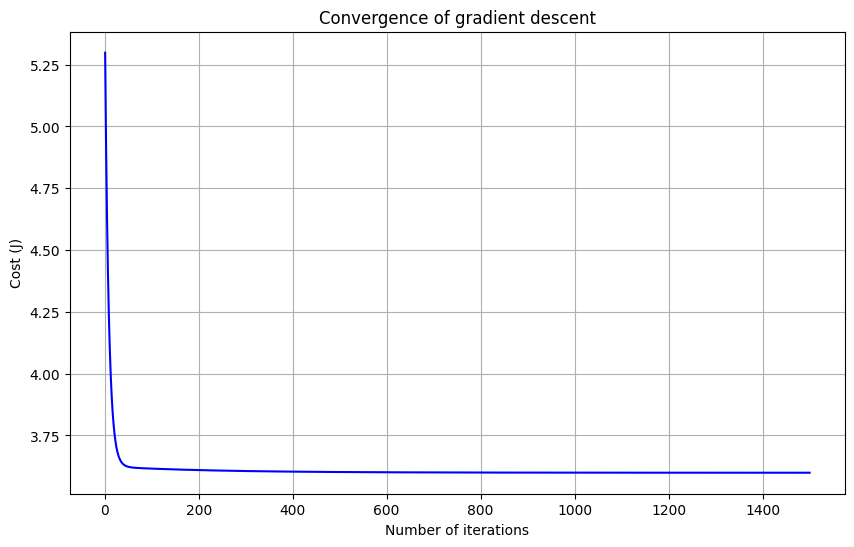

In [ ]:
X = df.values[:, 1]  # get input values from first column -- X is a list here
y = df.values[:, 3]  # get output values from second column -- Y is the list here
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

print('X = ', X[: 97])
print('y = ', y[: 97])

X = df.values[:, 1]  # get input values from the first column -- X is a list here which is a 1 dimentional array
y = df.values[:, 3]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(X, y, color='red', marker='+')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

X_0 = np.ones((m, 1))
X_0[:5]

X_1 = X.reshape(m, 1)
X_1[:10]

# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

theta = np.zeros(2)
theta



    # Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)



theta = [0., 0.]
iterations = 1500
alpha = 0.01

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

MODEL FOR EXPLONATORY VARIABLE X3 VS Y

X =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100
X =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939 2.68242424
 3.13090909 3.57939394 0.02787879 0.47636364 0.92484849 1.37333333
 1.82181818 2.27030303 2.71878788 3.16727273 3.61575758 0.06424242
 0.51272727 0.96121212 1.40969697 1.85818182 2.30666667 2.75515152
 3.20363636 3.65212121 0.10060606 0.54909091 0.99757576 1.44606061
 1.89454546 2.3430303  2.79151515 3.24       3.68848485 0.1369697
 0.58545455 1.03393939 1.48242424 1.93090909 2.37939394 2.82787879
 3.27636364 3.72484848 0.17333333 0.62181818 1.07030303 1.51878788
 1.96727273 2.41575758 2.86424242 3.31272727 3.76121212 0.20969697
 0.65818182 1.10666667 1.55515151 2.00363636 2.45212121 2.90060606
 3.34909091 3.79757576 0.24606061 0.69454545 1.1430303  1.59151515
 2.04       2.48848485 2.9369697  3.38545454 3.83393939 0.28242424
 0.73090909 1.17939394 1.62787879 2.07636364 2.524

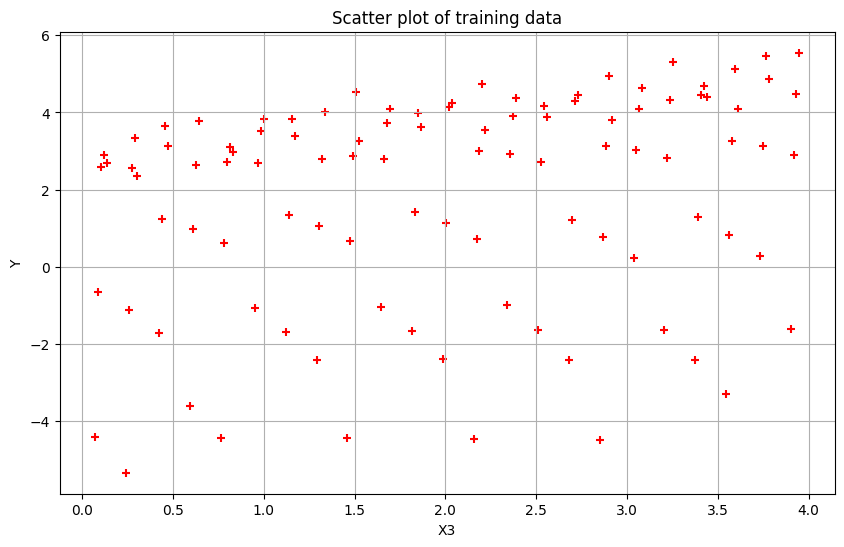

The cost for given values of theta_0 and theta_1 = 5.524438459196242
Final value of theta = [0.71988473 0.56390334]
cost_history = [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]


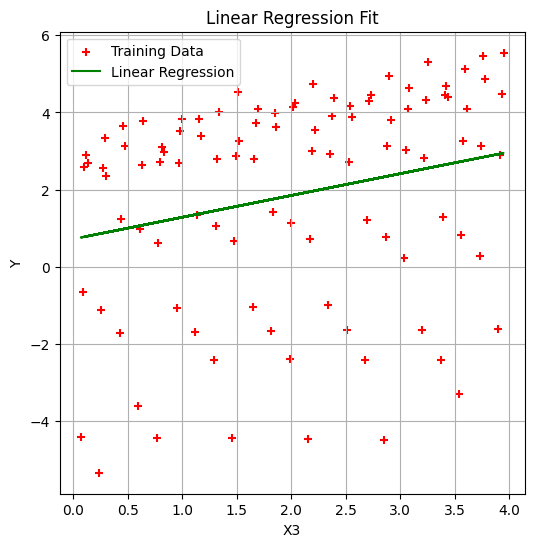

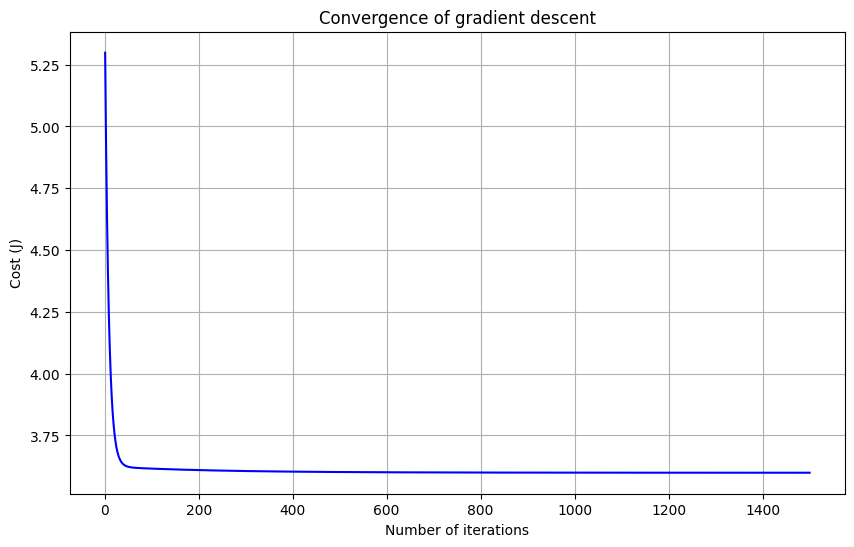

In [ ]:
X = df.values[:, 2]  # get input values from first column -- X is a list here
y = df.values[:, 3]  # get output values from second column -- Y is the list here
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

print('X = ', X[: 97])
print('y = ', y[: 97])

X = df.values[:, 1]  # get input values from the first column -- X is a list here which is a 1 dimentional array
y = df.values[:, 3]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(X, y, color='red', marker='+')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

X_0 = np.ones((m, 1))
X_0[:5]

X_1 = X.reshape(m, 1)
X_1[:10]

# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

theta = np.zeros(2)
theta


    # Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)


theta = [0., 0.]
iterations = 1500
alpha = 0.01

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [ ]:
# X1 ALPHA=0.1

MODEL FOR EXPLONATORY VARIABLE X1 VS Y ALPHA =0.1

X =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100
X =  [0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525252 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454546 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.5050505  2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.0707

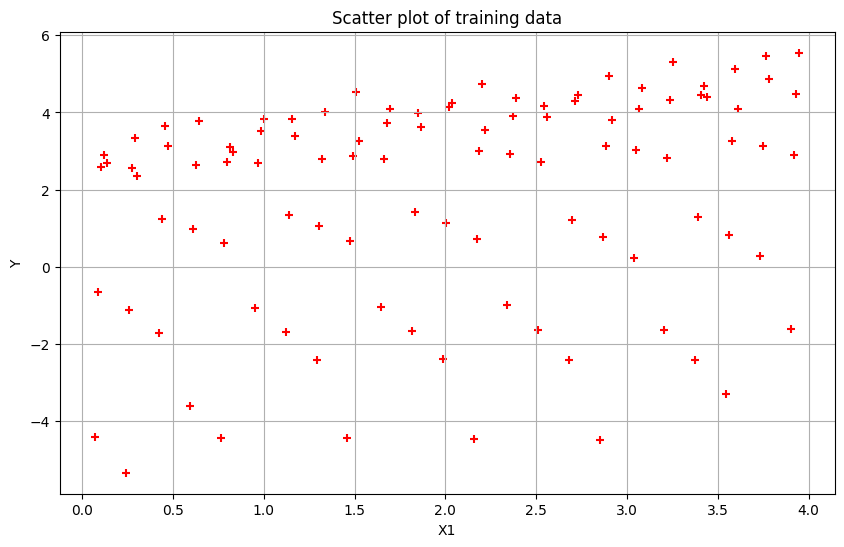

The cost for given values of theta_0 and theta_1 = 5.524438459196242
Final value of theta = [0.73606043 0.55760761]
cost_history = [3.90731819 3.66528504 3.62832072 ... 3.59936602 3.59936602 3.59936602]


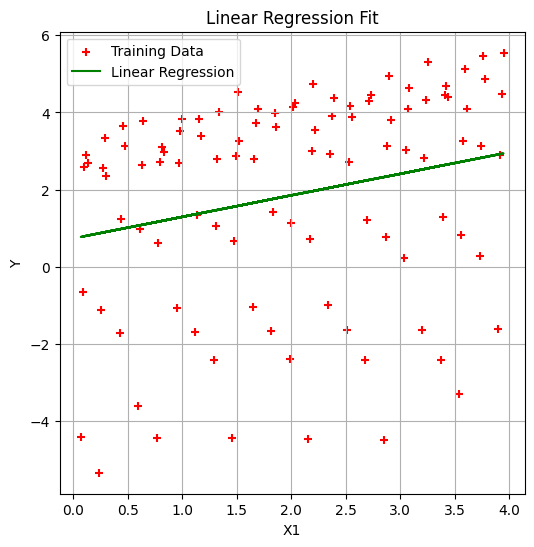

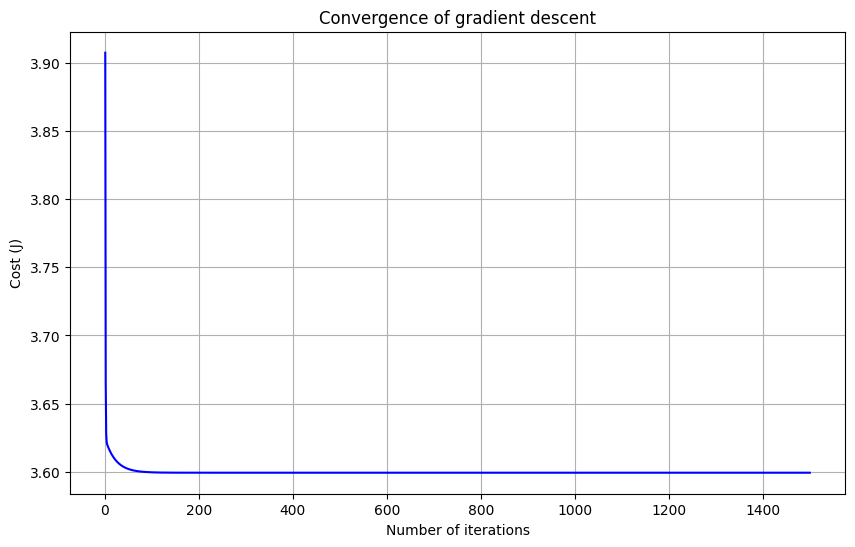

In [ ]:
X = df.values[:, 0]  # get input values from first column -- X is a list here
y = df.values[:, 3]  # get output values from second column -- Y is the list here
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

print('X = ', X[: 97])
print('y = ', y[: 97])

X = df.values[:, 1]  # get input values from the first column -- X is a list here which is a 1 dimentional array
y = df.values[:, 3]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(X, y, color='red', marker='+')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

X_0 = np.ones((m, 1))
X_0[:5]

X_1 = X.reshape(m, 1)
X_1[:10]

# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

theta = np.zeros(2)
theta



    # Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)



theta = [0., 0.]
iterations = 1500
alpha = 0.1

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [ ]:
# X2 ALPHA=0.1

MODEL FOR EXPLONATORY VARIABLE X2 VS Y ALPHA =0.1

X =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100
X =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798 2.91474747
 3.60969697 0.30464646 0.99959596 1.69454546 2.38949495 3.08444444
 3.77939394 0.47434343 1.16929293 1.86424242 2.55919192 3.25414141
 3.94909091 0.6440404  1.3389899  2.03393939 2.72888889 3.42383838
 0.11878788 0.81373737 1.50868687 2.20363636 2.89858586 3.59353535
 0.28848485 0.98343434 1.67838384 2.37333333 3.06828283 3.76323232
 0.45818182 1.15313131 1.84808081 2.5430303  3.2379798  3.93292929
 0.62787879 1.32282828 2.01777778 2.71272727 3.40767677 0.10262626
 0.79757576 1.49252525 2.18747475 2.88242424 3.57737374 0.27232323
 0.96727273 1.66222222 2.35717172 3.05212121 3.74707071 0.4420202
 1.1369697  1.83191919 2.52686869 3.22181818 3.91676768 0.61171717
 1.30666667 2.00161616 2.69656566 3.39151515 0.08646465 0.78141414
 1.47636364 2.17131313 2.86626263 3.56121212 0.256

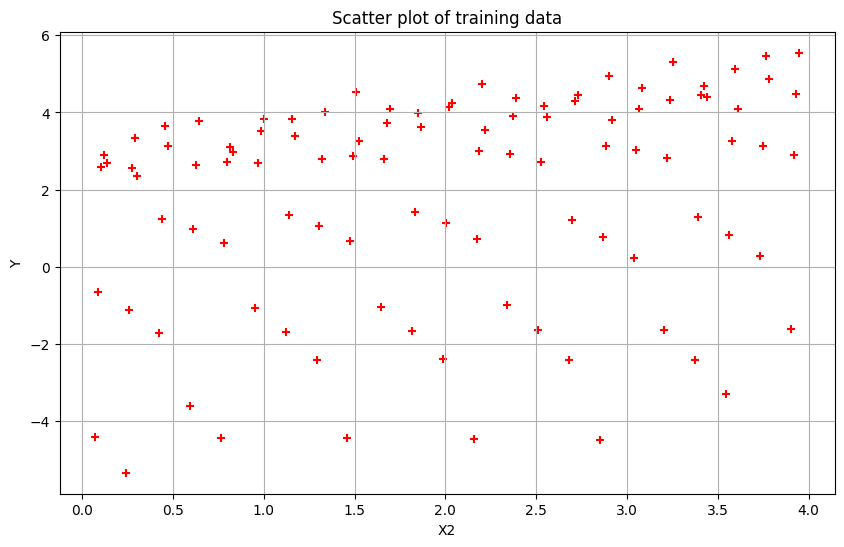

The cost for given values of theta_0 and theta_1 = 5.524438459196242
Final value of theta = [0.73606043 0.55760761]
cost_history = [3.90731819 3.66528504 3.62832072 ... 3.59936602 3.59936602 3.59936602]


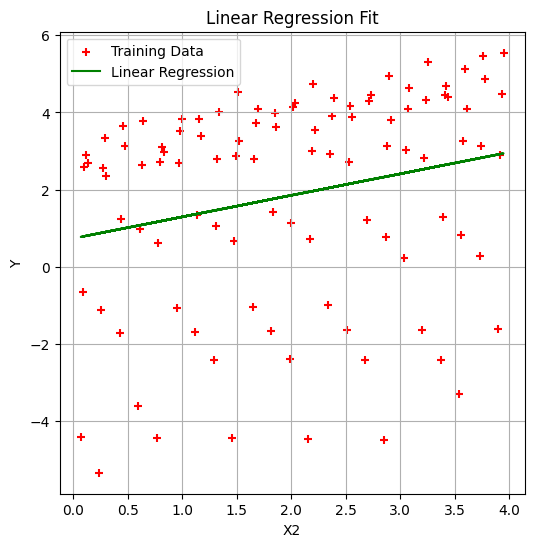

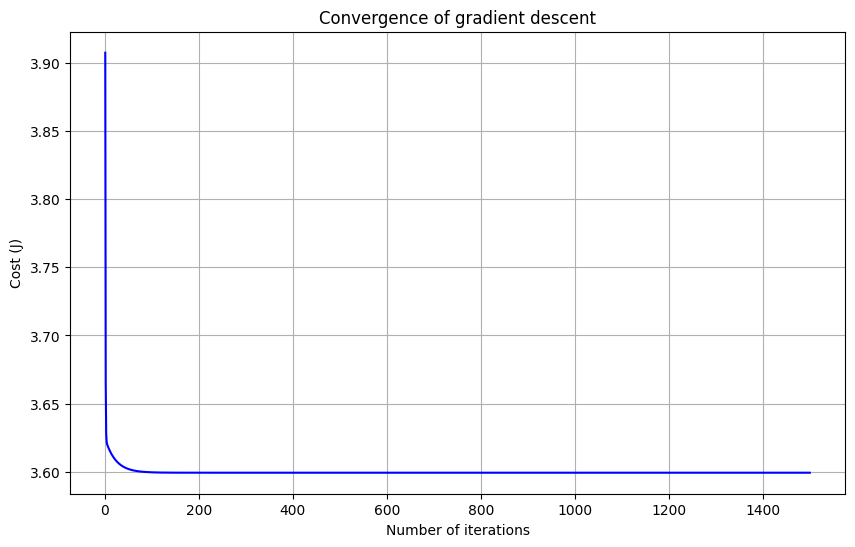

In [ ]:
X = df.values[:, 1]  # get input values from first column -- X is a list here
y = df.values[:, 3]  # get output values from second column -- Y is the list here
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

print('X = ', X[: 97])
print('y = ', y[: 97])

X = df.values[:, 1]  # get input values from the first column -- X is a list here which is a 1 dimentional array
y = df.values[:, 3]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(X, y, color='red', marker='+')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

X_0 = np.ones((m, 1))
X_0[:5]

X_1 = X.reshape(m, 1)
X_1[:10]

# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

theta = np.zeros(2)
theta



    # Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)



theta = [0., 0.]
iterations = 1500
alpha = 0.1

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

MODEL FOR EXPLONATORY VARIABLE X3 VS Y ALPHA =0.1

X =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100
X =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939 2.68242424
 3.13090909 3.57939394 0.02787879 0.47636364 0.92484849 1.37333333
 1.82181818 2.27030303 2.71878788 3.16727273 3.61575758 0.06424242
 0.51272727 0.96121212 1.40969697 1.85818182 2.30666667 2.75515152
 3.20363636 3.65212121 0.10060606 0.54909091 0.99757576 1.44606061
 1.89454546 2.3430303  2.79151515 3.24       3.68848485 0.1369697
 0.58545455 1.03393939 1.48242424 1.93090909 2.37939394 2.82787879
 3.27636364 3.72484848 0.17333333 0.62181818 1.07030303 1.51878788
 1.96727273 2.41575758 2.86424242 3.31272727 3.76121212 0.20969697
 0.65818182 1.10666667 1.55515151 2.00363636 2.45212121 2.90060606
 3.34909091 3.79757576 0.24606061 0.69454545 1.1430303  1.59151515
 2.04       2.48848485 2.9369697  3.38545454 3.83393939 0.28242424
 0.73090909 1.17939394 1.62787879 2.07636364 2.524

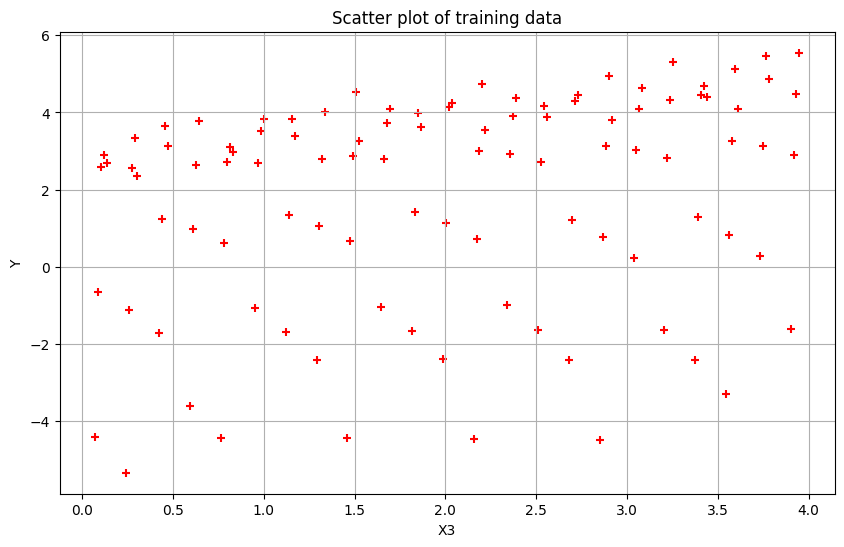

The cost for given values of theta_0 and theta_1 = 5.524438459196242
Final value of theta = [0.73606043 0.55760761]
cost_history = [3.90731819 3.66528504 3.62832072 ... 3.59936602 3.59936602 3.59936602]


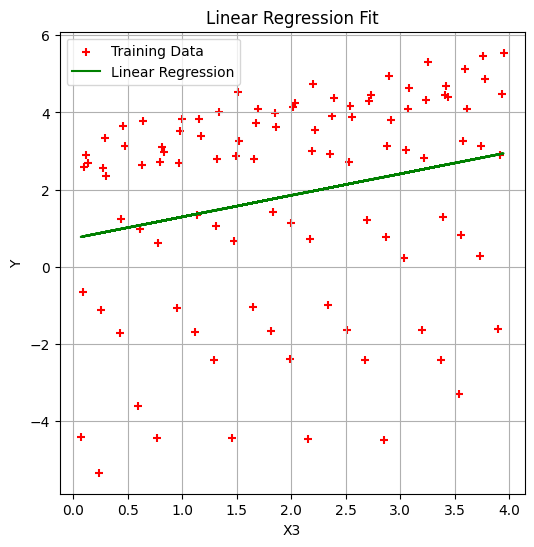

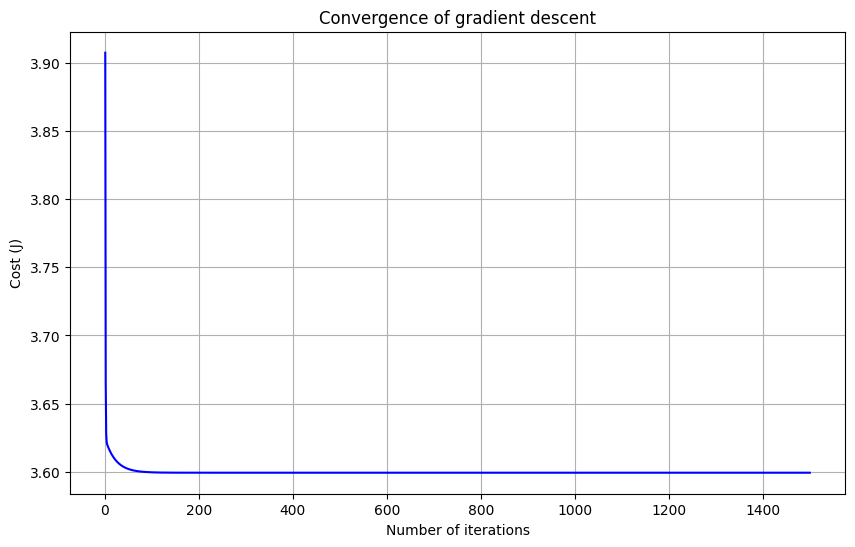

In [ ]:
X = df.values[:, 2]  # get input values from first column -- X is a list here
y = df.values[:, 3]  # get output values from second column -- Y is the list here
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

print('X = ', X[: 97])
print('y = ', y[: 97])

X = df.values[:, 1]  # get input values from the first column -- X is a list here which is a 1 dimentional array
y = df.values[:, 3]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(X, y, color='red', marker='+')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

X_0 = np.ones((m, 1))
X_0[:5]

X_1 = X.reshape(m, 1)
X_1[:10]

# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

theta = np.zeros(2)
theta


    # Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)


theta = [0., 0.]
iterations = 1500
alpha = 0.1

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [ ]:
#

INPUT:X1 X2 X3 OUTPUT:Y ALPHA:0.1

In [ ]:
#2222222

X = df.values[:, 0:3]  # get input values from first column -- X is a list here
y = df.values[:, 3]  # get output values from second column -- Y is the list here


In [ ]:
X.shape

(100, 3)

In [ ]:
X_0 = np.ones((m, 1))
X_0[:5]

X_1 = X
X_1[:10]

# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)



The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [ ]:
cost

5.524438459196242

In [ ]:
iterations = 1500
alpha = 0.1



In [ ]:
theta

array([0., 0., 0., 0.])

In [ ]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)



Final value of theta = [ 5.31416563 -2.00371905  0.53256359 -0.26560164]
cost_history = [4.13064348 3.51770697 3.12758306 ... 0.73846424 0.73846424 0.73846424]


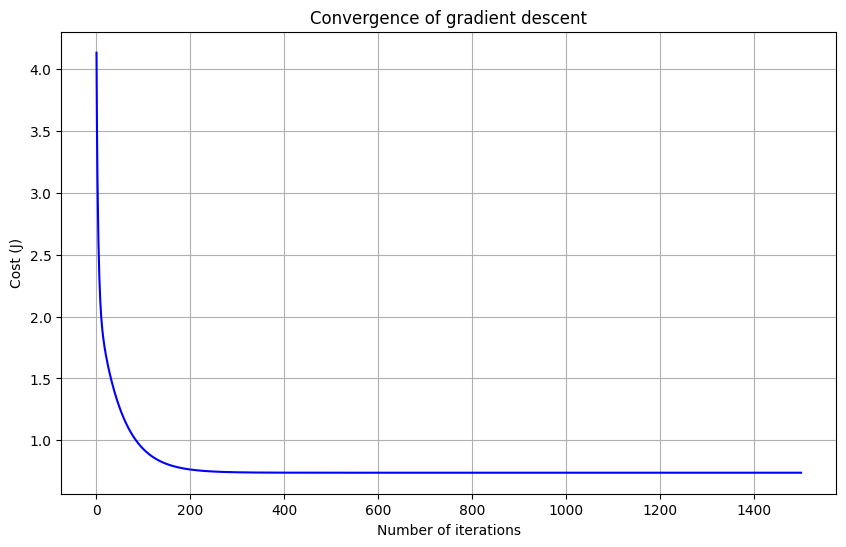

In [ ]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

INPUT:X1 X2 X3 OUTPUT:Y ALPHA:0.01

In [ ]:
X = df.values[:, 0:3]  # get input values from first column -- X is a list here
y = df.values[:, 3]  # get output values from second column -- Y is the list here


In [ ]:
X.shape

(100, 3)

In [ ]:
X_0 = np.ones((m, 1))
X_0[:5]

X_1 = X
X_1[:10]

# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)


The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [ ]:
cost

5.524438459196242

In [ ]:
iterations = 1500
alpha = 0.01

In [ ]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.05362928 -1.96691398  0.57561561 -0.22741231]
cost_history = [0.81036688 0.8102236  0.81008061 ... 0.74209453 0.7420873  0.74208008]


In [ ]:
cost_history[-1]

0.7420800755043522

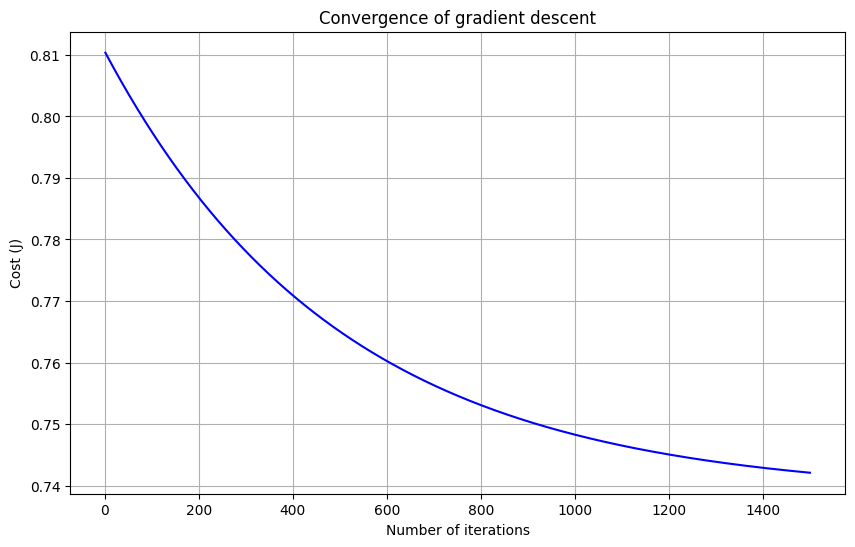

In [ ]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()